# Step-1: Installing the required Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

import mlflow
import mlflow.sklearn
from mlflow import log_param, log_metric, log_artifact


# Step-2

## Loading the dataset

In [2]:
titanic_df = pd.read_csv('Titanic_Data_Set.csv')
titanic_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


## 2.a) Performing basic EDA

In [3]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
titanic_df.isnull().sum()/len(titanic_df)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

### Dropping the redundant columns

In [6]:
df = titanic_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis =1)
df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C


### Handling the Missing values

In [7]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

C:\Users\Munjala Hari Krishna\AppData\Local\Temp\ipykernel_15748\3255828239.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

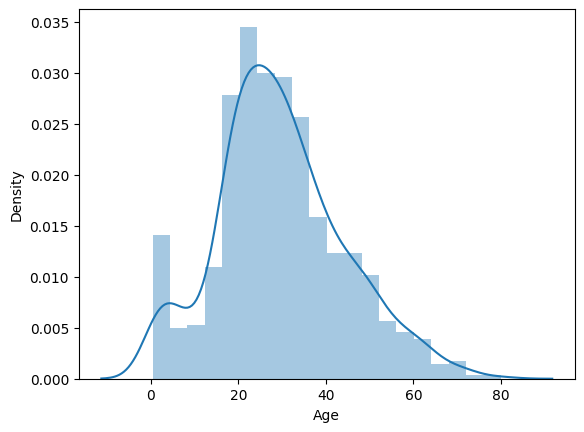

In [8]:
sns.distplot(df['Age'])

In [9]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [10]:
#Missing values imputation
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [11]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

### Encoding the Categorical columns

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [13]:
# df['Survived'] = df['Survived'].astype('object')
df['Pclass'] = df['Pclass'].astype('object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    object 
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 55.8+ KB


In [15]:
# Encoding the categorical variables
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

df['Pclass'] = label_encoder.fit_transform(df['Pclass'])

df = pd.get_dummies(df, prefix='Sex', columns=['Sex'])
df = pd.get_dummies(df, prefix='Embarked', columns=['Embarked'])

df.head(5)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,2,22.0,1,0,7.2500,False,True,False,False,True
1,1,0,38.0,1,0,71.2833,True,False,True,False,False
2,1,2,26.0,0,0,7.9250,True,False,False,False,True
3,1,0,35.0,1,0,53.1000,True,False,False,False,True
4,0,2,35.0,0,0,8.0500,False,True,False,False,True


# Step-3

## Building the model and predicting the survivors
## Logging the parameters, evaluation metrics

In [16]:
def titan_model_run(n_estimators, criterion, test_size):
    mlflow.set_experiment(experiment_name='mlflow_titanic_survivals')
    with mlflow.start_run(nested=True) as mlrun:
        data_df = df

        x_train, x_test, y_train, y_test = train_test_split(data_df.drop('Survived', axis=1), data_df['Survived'], test_size= test_size, random_state= 10)
        print(x_train.shape, x_test.shape)
        mlflow.log_param('test_size', test_size)

        rf_model = RandomForestClassifier(n_estimators = n_estimators, criterion = criterion, random_state=19)
        print('model intanstiatted')
        
        mlflow.log_param('n_estimators', n_estimators)
        mlflow.log_param('criterion', criterion)

        rf_model.fit(x_train, y_train)
        print('Model Trained')

        train_pred = rf_model.predict(x_train)
        test_pred = rf_model.predict(x_test)

        train_accuracy = metrics.accuracy_score(train_pred, y_train)
        print('train_accuracy', train_accuracy)
        test_accuracy = metrics.accuracy_score(test_pred, y_test)
        print('test_accuracy', test_accuracy)

        log_metric('Accuracy', test_accuracy)

        precision = metrics.precision_score(y_test, test_pred)
        log_metric('precision', precision)
        print('precision', precision)

        recall = metrics.recall_score(y_test, test_pred)
        log_metric('recall', recall)
        print('recall', recall)

        f1Score = metrics.f1_score(y_test, test_pred)
        log_metric('f1Score', f1Score)
        print('f1Score', f1Score)

        mlflow.sklearn.log_model(rf_model, 'Model')
    
    mlflow.end_run()


    




# Step-4

## Running the model and tacking the parameters in mlflow ui

In [17]:
titan_model_run(100, 'entropy', 0.3)

2023/10/19 00:10:42 INFO mlflow.tracking.fluent: Experiment with name 'mlflow_titanic_survivals' does not exist. Creating a new experiment.


(623, 10) (268, 10)
model intanstiatted
Model Trained
train_accuracy 0.9839486356340289
test_accuracy 0.8097014925373134
precision 0.7216494845360825
recall 0.7446808510638298
f1Score 0.7329842931937173


# Step-5

## Re-running the model with different parameter values

In [20]:
titan_model_run(200, 'gini', 0.2)

(712, 10) (179, 10)
model intanstiatted
Model Trained
train_accuracy 0.9831460674157303
test_accuracy 0.8324022346368715
precision 0.75
recall 0.7741935483870968
f1Score 0.7619047619047619


C:\Users\Munjala Hari Krishna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
C:\Users\Munjala Hari Krishna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


**We can observe that with changes in the parameters, the second run is giving the better metrics than the first one.**